In [1]:
import numpy as np
import os
os.chdir('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/')
import argparse
import utils as autils
from utils import DUST_TYPES
from orphics import cosmology
import pyfisher
from sofind import DataModel
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from matplotlib import rcParams
from solenspipe.utility import w_n
rcParams['font.size']=20
rcParams['axes.linewidth']=1.5
rcParams['xtick.major.width']=1.5
rcParams['xtick.minor.width']=1
rcParams['ytick.major.width']=1.5
rcParams['ytick.minor.width']=1
rcParams['xtick.major.pad']='8'
rcParams['xtick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
rcParams['ytick.right'] = True
rcParams['text.usetex'] = True
rcParams['font.family'] = 'Helvetica'

%matplotlib inline

--------------------------------------------------------------------------

  Local host:   cpu-q-163
  Local device: mlx5_0
--------------------------------------------------------------------------


In [2]:
dict_plot = {}
dict_plot['GAL040'] = {'linestyle': 'dotted', 'label': 'ACT 40\%'}
dict_plot['GAL060'] = {'linestyle': 'dashed', 'label': 'ACT 60\%'}
dict_plot['GAL070'] = {'linestyle': 'solid', 'label': 'ACT 70\%'}
dict_plot['GAL080'] = {'linestyle': 'dotted', 'label': 'ACT 80\%'}

dict_plot['lmin100'] = {'linestyle': 'dotted', 'label': r'$\ell_{\textrm{min}} = 100$'}
dict_plot['lmin1000'] = {'linestyle': 'dashed', 'label': r'$\ell_{\textrm{min}} = 1000$'}
dict_plot['lmin600'] = {'linestyle': 'solid', 'label': r'$\ell_{\textrm{min}} = 600$'}
dict_plot['lmax3000'] = {'linestyle': 'solid', 'label': r'$\ell_{\textrm{max}} = 3000$'}
dict_plot['lmax3500'] = {'linestyle': 'dashed', 'label': r'$\ell_{\textrm{max}} = 3500$'}

cmap = plt.cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]

dict_plot['gauss'] = {'color': colors[0], 'label': 'Gaussian field'}
dict_plot['d9'] = {'color': colors[1], 'label': 'PySM d9'}
dict_plot['d10'] = {'color': colors[2], 'label': 'PySM d10'}
dict_plot['d12'] = {'color': colors[3], 'label': 'PySM d12'}
dict_plot['DF'] = {'color': colors[4], 'label': 'DUSTFILAMENTS'}
dict_plot['van'] = {'color': colors[5], 'label': 'Vansyngel+17'}

In [11]:
args = argparse.Namespace()

args.mlmax=4000

args.width_ra=15
args.width_dec=10

# args.lmax=3000
# args.lmin=600
args.filter_whiteamplitude=12.
args.filter_whitefwhm=1.4

args.nsims_mf=50

args.config_name='act_dr6v4'
args.apodfact = '_d2apo3deg'
args.daynight='night'
args.mask_type='dr6v4_20240919'
args.mask_subproduct = 'lensing_masks'

args.est= 'TT'
args.output_dir = '/rds/project/dirac_vol5/rds-dirac-dp002/ia404/fgs/local_dustbias/'

In [12]:
dm = DataModel.from_config(args.config_name)
mask_options = {'apodfact': args.apodfact, 'daynight': args.daynight}

masks = []
wmasks = []
for skyfrac in ['GAL060', 'GAL070', 'GAL080']:
    mask_options['skyfrac'] = (skyfrac).split('GAL0')[1]
    mask = dm.read_mask(subproduct=args.mask_subproduct, mask_type=args.mask_type,**mask_options)
    masks.append(mask)
    wmasks.append(w_n(mask,1))

In [14]:
wmasks_dict = {'GAL060': wmasks[0],
               'GAL070': wmasks[1],
               'GAL080': wmasks[2]}

In [15]:
wmasks_dict

{'GAL060': 0.3085935157755685,
 'GAL070': 0.3398198442462398,
 'GAL080': 0.3726323035941579}

In [19]:
ell_arr = np.arange(args.mlmax+1)
lfac = (ell_arr * (ell_arr + 1))**2 / (2 * np.pi)
lfac_2pt = ell_arr * (ell_arr + 1)
lcut = 50
nbands_log = 20
nbands_lin = 5
lbands = np.concatenate((np.linspace(2, lcut, nbands_lin, dtype=int)[:-1], np.logspace(np.log10(lcut), np.log10(args.mlmax), nbands_log+1, dtype=int)))#  dtype=int)
nbands = len(lbands)-1
# leff = (lbands[1:] + lbands[:-1])/2. # [np.mean(np.arange(x,y)) for x,y in zip(lbands[:-1], lbands[1:])]

In [20]:
lbands

array([   2,   14,   26,   38,   49,   62,   77,   96,  120,  149,  186,
        231,  288,  359,  447,  556,  693,  862, 1074, 1337, 1665, 2072,
       2580, 3212, 4000])

In [21]:
# cents, bins = pyfisher.get_binner(lbands,interpolate=False)

In [22]:
theory = cosmology.default_theory()
tclkk = theory.gCl('kk',ell_arr)

tclpp = tclkk * 4 / (ell_arr * (ell_arr+1))**2
# tclkk_bin = bins(pyfisher.interp(ell_arr, tclkk, bounds_error=True))

/tmp/ipykernel_3342103/3636017728.py:4: RuntimeWarning: invalid value encountered in divide
  tclpp = tclkk * 4 / (ell_arr * (ell_arr+1))**2


In [23]:
# args.lmin = 600
# args.lmax = 3000
# autils.get_norm_name(args)

In [24]:
# # load filters
# Als = np.load(baseline_path + f'stage_compute_filters/{autils.get_norm_name(args)}', allow_pickle=True).item()

In [25]:
# Nl = Als[args.est][0] * (ell_arr*(ell_arr+1.)/2.)**2.
# nls_kk_bin = bins(pyfisher.interp(ells,Nl,bounds_error=True))

In [26]:
# delta_ell = np.diff(lbands)
# covariance_factor = 1/(delta_ell*fsky*(2*cents+1))
# covariance = 2 * (tclkk_bin + nls_kk_bin)**2 * covariance_factor

In [27]:
def return_sigmaAlens(args, lmin, lmax, lbands, fsky):
    # lbands is bin_edges
    
    ell_arr = np.arange(args.mlmax+1)
    cents, bins = pyfisher.get_binner(lbands,interpolate=False)
    
    args.lmin = lmin
    args.lmax = lmax
    
    theory = cosmology.default_theory()
    tclkk = theory.gCl('kk',ell_arr)
    tclkk_bin = bins(pyfisher.interp(ell_arr, tclkk, bounds_error=True))
    
    Als = np.load(args.output_dir + f'stage_compute_filters/{autils.get_norm_name(args)}', allow_pickle=True).item()
    
    Nl = Als[args.est][0] * (ell_arr*(ell_arr+1.)/2.)**2.
    nls_kk_bin = bins(pyfisher.interp(ell_arr,Nl,bounds_error=True))
    
    delta_ell = np.diff(lbands)
    covariance_factor = 1/(delta_ell*fsky*(2*cents+1))
    covariance = 2 * (tclkk_bin + nls_kk_bin)**2 * covariance_factor
    
    return covariance, tclkk_bin # , sum(tclkk_bin**2/covariance), 1/np.sqrt(sum(tclkk_bin**2 / covariance))

In [28]:
# computation = return_sigmaAlens(args, 600, 3000, lbands, 0.3)
# computation

In [29]:
npatches = {}
for skyfrac in autils.FSKYS:
    npatches[skyfrac] = np.load(args.output_dir + f'local_masks/submap_coordinates_{skyfrac}_{args.width_ra}_{args.width_dec}.npy').shape[0]
print(npatches)

{'GAL060': 111, 'GAL070': 118, 'GAL080': 133}


In [30]:
def args_baseline(args, skyfrac, dust_type):
    
    args.lmax=3000
    args.lmin=600
    args.dust_type=dust_type
    args.dust_freq=90.
    args.skyfrac=skyfrac
    
    return args

def args_lmin(args, lmin, dust_type, skyfrac='GAL070'):
    
    args.lmax=3000
    args.lmin=lmin
    args.dust_type=dust_type
    args.dust_freq=90.
    args.skyfrac=skyfrac
    
    return args

def args_lmax(args, lmax, dust_type, skyfrac='GAL070'):
    
    args.lmax=lmax
    args.lmin=600
    args.dust_type=dust_type
    args.dust_freq=90.
    args.skyfrac=skyfrac
    
    return args

In [31]:
path_recons = lambda ipatch, args, tag, mf: args.output_dir + f'stage_reconstruction/{autils.get_recons_name(ipatch, args, tag, mf)}'

In [32]:
raw_4pt = {}
rawmf_4pt = {}
n0_4pt = {}
reconstructed_cl = {}
cl_nobias = {}

for skyfrac in autils.FSKYS:
    for dust_type in autils.DUST_TYPES:
        for test in ['baseline', 'lmin1000', 'lmin100', 'lmax3500']:
            
            raw_4pt[f'{dust_type}_{skyfrac}_{test}'] = [None] * npatches[skyfrac]
            rawmf_4pt[f'{dust_type}_{skyfrac}_{test}'] = [None] * npatches[skyfrac]
            n0_4pt[f'{dust_type}_{skyfrac}_{test}'] = [None] * npatches[skyfrac]
            cl_nobias[f'{dust_type}_{skyfrac}_{test}'] = [None] * npatches[skyfrac]

In [33]:
TEST='baseline'

for SKYFRAC in autils.FSKYS:
    for n in range(npatches[SKYFRAC]):
        for dust_type in autils.DUST_TYPES:
            raw_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_baseline(args, SKYFRAC, dust_type), 'auto', mf=False))
            rawmf_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_baseline(args, SKYFRAC, dust_type), 'auto', mf=True))
            n0_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_baseline(args, SKYFRAC, dust_type), 'N0', mf=False))

for SKYFRAC in autils.FSKYS:
    for n in range(npatches[SKYFRAC]):
        for dust_type in autils.DUST_TYPES:
            cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = rawmf_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n][:args.mlmax+1] - n0_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n][:args.mlmax+1]

for SKYFRAC in autils.FSKYS:
    for dust_type in autils.DUST_TYPES:
        reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'] = np.nanmean(np.asarray(list(cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'])), axis=0)

/tmp/ipykernel_3342103/4174546873.py:17: RuntimeWarning: Mean of empty slice
  reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'] = np.nanmean(np.asarray(list(cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'])), axis=0)


In [34]:
SKYFRAC='GAL070'

for TEST in ['lmin100', 'lmin1000']:
    lmin = TEST.split('lmin')[1]
    for n in range(npatches[SKYFRAC]):
        for dust_type in autils.DUST_TYPES:
            raw_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_lmin(args, lmin, dust_type), 'auto', mf=False))
            rawmf_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_lmin(args, lmin, dust_type), 'auto', mf=True))
            n0_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_lmin(args, lmin, dust_type), 'N0', mf=False))

for TEST in ['lmin100', 'lmin1000']:
    for n in range(npatches[SKYFRAC]):
        for dust_type in autils.DUST_TYPES:
            cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = rawmf_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n][:args.mlmax+1] - n0_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n][:args.mlmax+1]

for TEST in ['lmin100', 'lmin1000']:
    for dust_type in autils.DUST_TYPES:
        reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'] = np.nanmean(np.asarray(list(cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'])), axis=0)

/tmp/ipykernel_3342103/2583792389.py:18: RuntimeWarning: Mean of empty slice
  reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'] = np.nanmean(np.asarray(list(cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'])), axis=0)


In [35]:
SKYFRAC = 'GAL070'
TEST='lmax3500'
lmax=TEST.split('lmax')[1]

for n in range(npatches[SKYFRAC]):
    for dust_type in autils.DUST_TYPES:
        raw_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_lmax(args, lmax, dust_type), 'auto', mf=False))
        rawmf_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_lmax(args, lmax, dust_type), 'auto', mf=True))
        n0_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = np.loadtxt(path_recons(n, args_lmax(args, lmax, dust_type), 'N0', mf=False))

for n in range(npatches[SKYFRAC]):
    for dust_type in autils.DUST_TYPES:
        cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'][n] = rawmf_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n][:args.mlmax+1] - n0_4pt[f'{dust_type}_{SKYFRAC}_{TEST}'][n][:args.mlmax+1]

for dust_type in autils.DUST_TYPES:
    reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'] = np.nanmean(np.asarray(list(cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'])), axis=0)

/tmp/ipykernel_3342103/1502726612.py:16: RuntimeWarning: Mean of empty slice
  reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'] = np.nanmean(np.asarray(list(cl_nobias[f'{dust_type}_{SKYFRAC}_{TEST}'])), axis=0)


In [36]:
cents, bins = pyfisher.get_binner(lbands,interpolate=False)

/tmp/ipykernel_3342103/1815602439.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-1e-12, 5e-7) # #pyfisher.interp(ell_arr, tclkk, bounds_error=True))


Text(0, 0.5, '$L^2(L+1)^2C_L^{\\phi\\phi}/2\\pi$')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


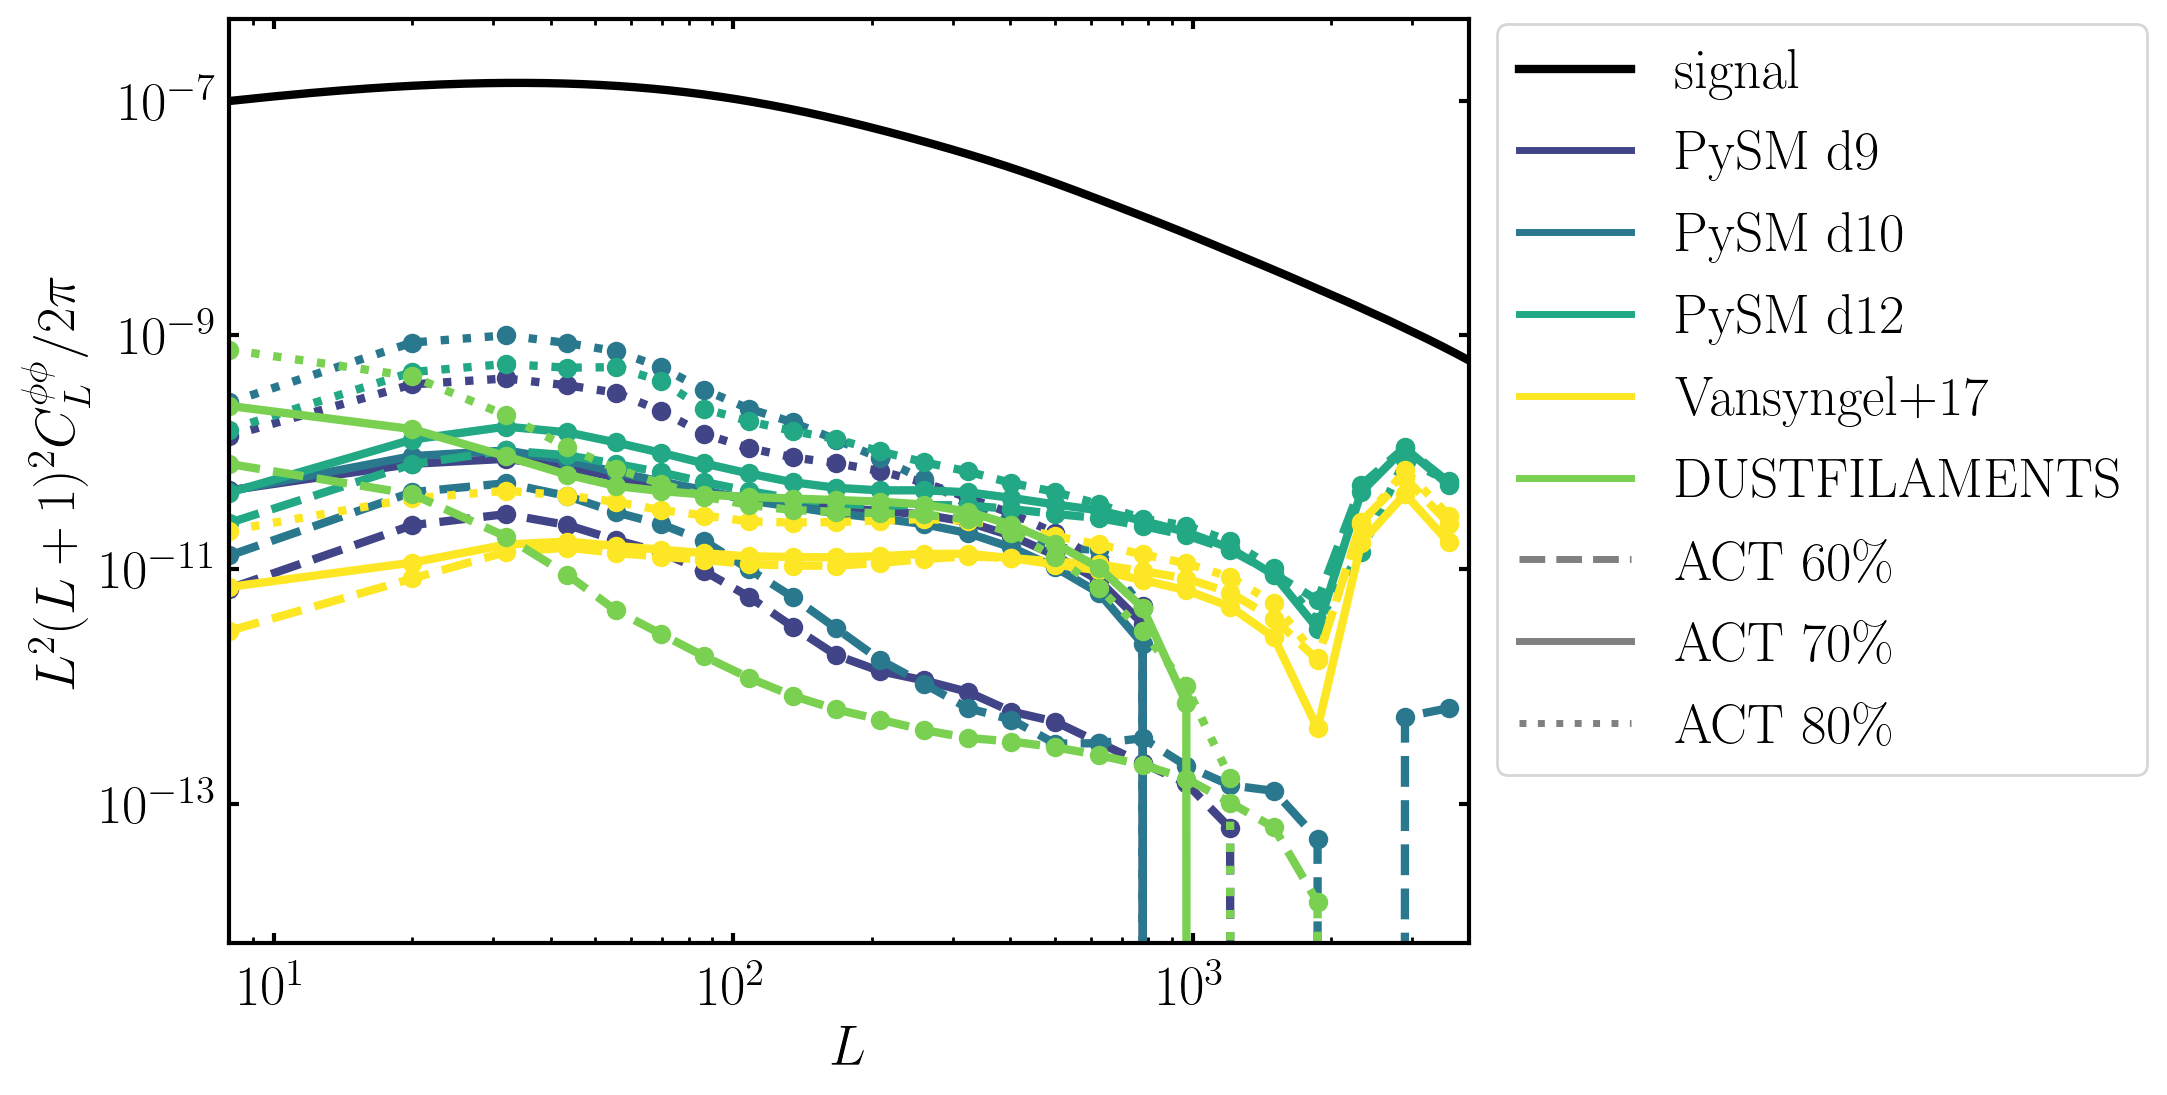

In [37]:
TEST='baseline'
SKYFRAC = 'GAL060'

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=200)

ax.loglog(ell_arr[2:], (tclpp*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='signal')
for dust_type in autils.DUST_TYPES[1:]:
    for SKYFRAC in autils.FSKYS:
        ax.loglog(cents, (bins(pyfisher.interp(ell_arr, lfac*reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'], bounds_error=True))),'o-',color=dict_plot[dust_type]['color'], linestyle=dict_plot[SKYFRAC]['linestyle'], linewidth = 3, label=dust_type)#)))#[:args.mlmax+1]*lfac)[2:] / (clpp[:args.mlmax+1]*lfac)[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot[SKYFRAC]['linestyle'], linewidth = 3, label=dust_type)
ax.set_ylim(-1e-12, 5e-7) # #pyfisher.interp(ell_arr, tclkk, bounds_error=True))
ax.set_xlim(8,4000)

custom_lines1 = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
custom_lines2 = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in autils.DUST_TYPES[1:]]
custom_lines3 = [Line2D([0], [0], color='gray', linestyle = dict_plot[GAL]['linestyle'], lw=2.5) for GAL in autils.FSKYS]

custom_lines = custom_lines1 + custom_lines2 + custom_lines3

legend_lines1 = ['signal']
legend_lines2 = [dict_plot[fg_type]['label'] for fg_type in autils.DUST_TYPES[1:]]
legend_lines3 = [dict_plot[GAL]['label'] for GAL in autils.FSKYS]

legend_lines = legend_lines1 + legend_lines2 +legend_lines3 

legend = ax.legend(custom_lines, legend_lines, bbox_to_anchor=(1, 1.025), loc = 'upper left')

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$')

#fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/baseline_fsky.png', bbox_inches='tight')

/tmp/ipykernel_3342103/89120379.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(cents, (bins(pyfisher.interp(ell_arr, (reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}']/tclpp), bounds_error=True))),'o-',color=dict_plot[dust_type]['color'], linestyle=dict_plot[SKYFRAC]['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_3342103/89120379.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(cents, (bins(pyfisher.interp(ell_arr, (reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}']/tclpp), bounds_error=True))),'o-',color=dict_plot[dust_type]['color'], linestyle=dict_plot[SKYFRAC]['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_3342103/89120379.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(cents, (bins(pyfisher.interp(ell_arr, (reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}']/tclpp), bounds_error=True))),'o-',color=dict_plot[dust_type]['color'], linestyle=dict_plot[SKYFRAC]['linestyle'], linewidth = 3, lab

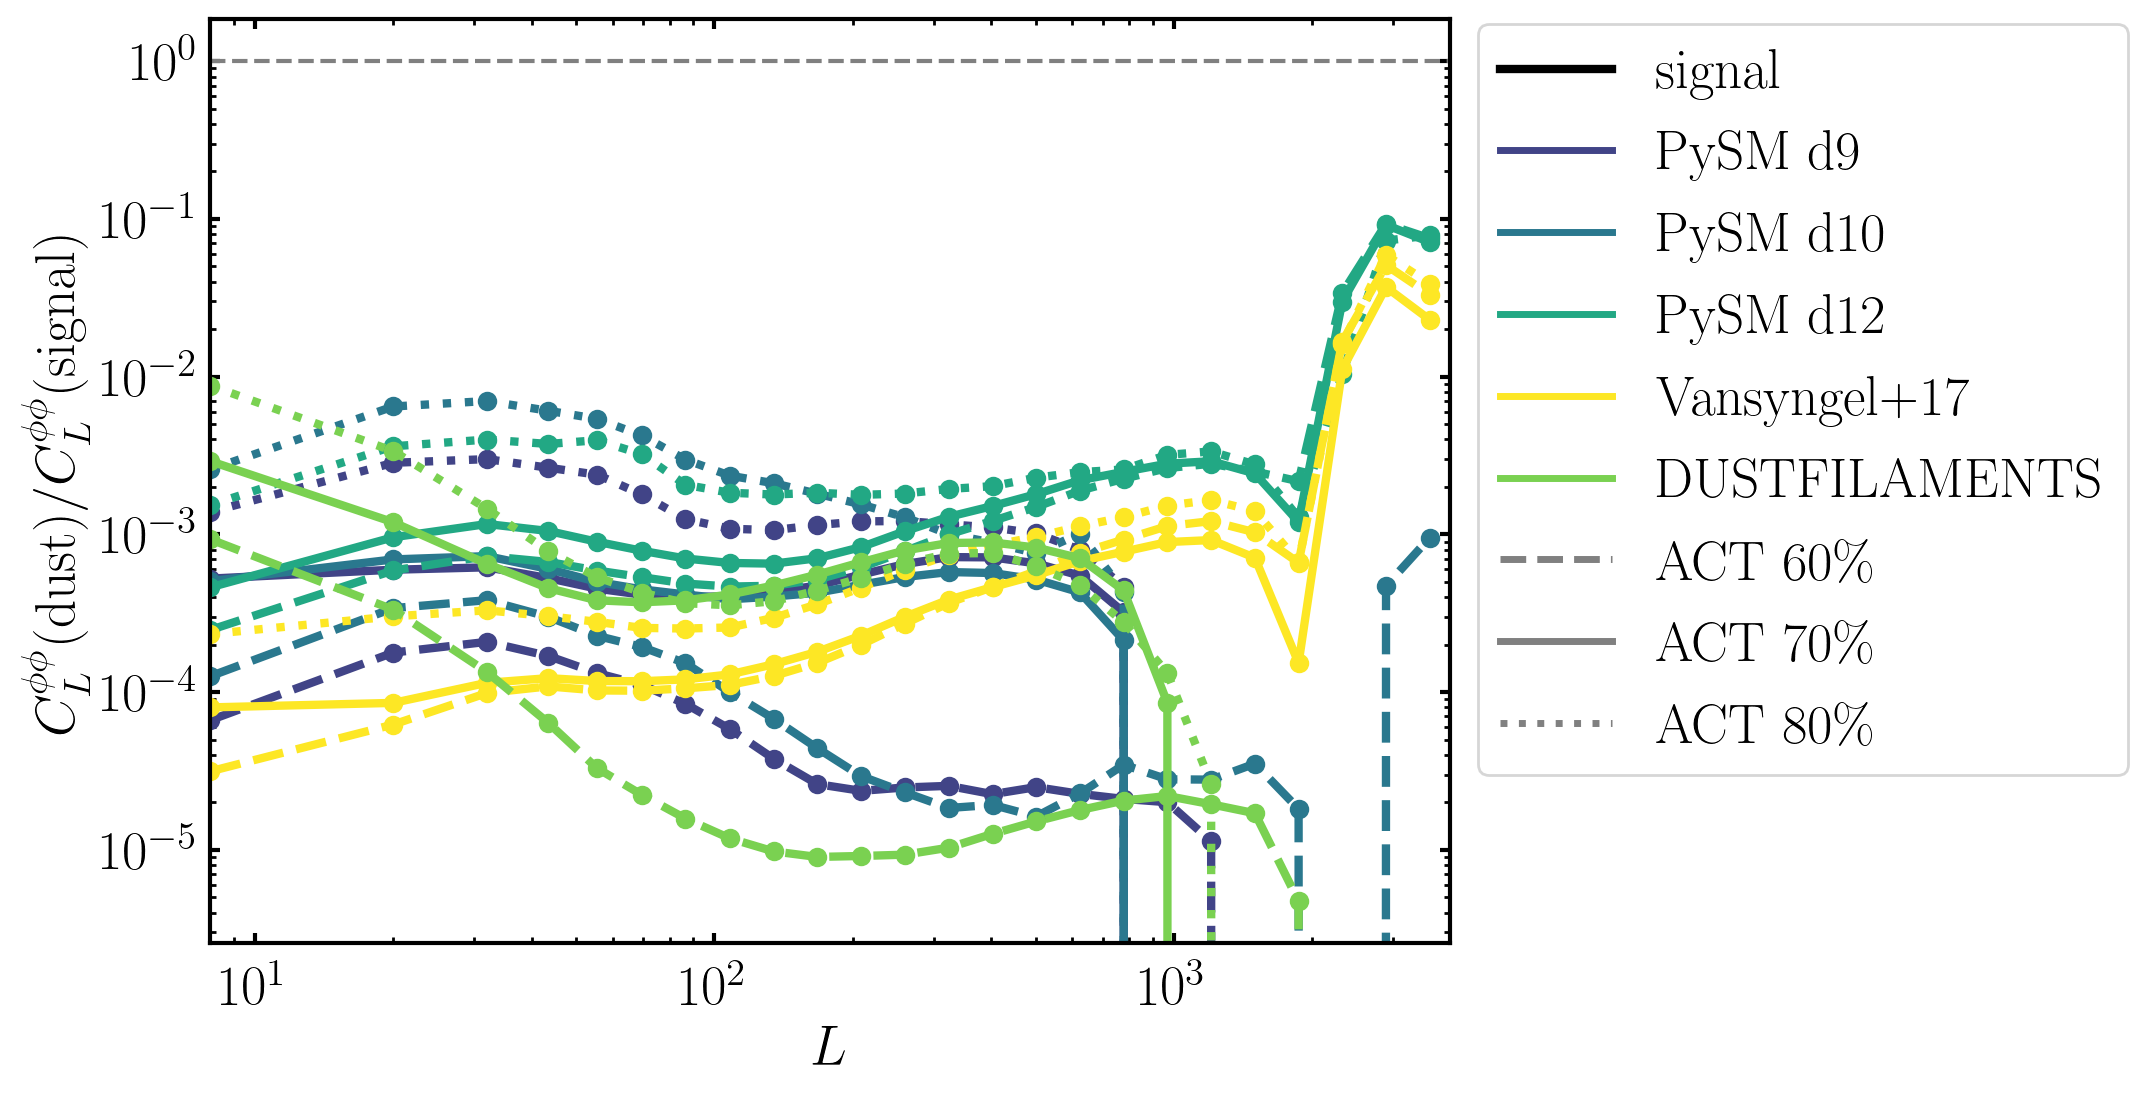

In [38]:
TEST='baseline'
SKYFRAC = 'GAL060'

fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=200)

for dust_type in autils.DUST_TYPES[1:]:
    for SKYFRAC in autils.FSKYS:
        ax.loglog(cents, (bins(pyfisher.interp(ell_arr, (reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}']/tclpp), bounds_error=True))),'o-',color=dict_plot[dust_type]['color'], linestyle=dict_plot[SKYFRAC]['linestyle'], linewidth = 3, label=dust_type)

ax.set_xlim(8,4000)

ax.axhline(1, color='gray', linestyle='dashed')

custom_lines1 = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
custom_lines2 = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in autils.DUST_TYPES[1:]]
custom_lines3 = [Line2D([0], [0], color='gray', linestyle = dict_plot[GAL]['linestyle'], lw=2.5) for GAL in autils.FSKYS]

custom_lines = custom_lines1 + custom_lines2 + custom_lines3

legend_lines1 = ['signal']
legend_lines2 = [dict_plot[fg_type]['label'] for fg_type in autils.DUST_TYPES[1:]]
legend_lines3 = [dict_plot[GAL]['label'] for GAL in autils.FSKYS]

legend_lines = legend_lines1 + legend_lines2 +legend_lines3 

legend = ax.legend(custom_lines, legend_lines, bbox_to_anchor=(1, 1.025), loc = 'upper left')

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$C_L^{\phi\phi}\textrm{(dust)}/C_L^{\phi\phi}\textrm{(signal)}$')
#fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/baseline_fsky_ratio.png', bbox_inches='tight')
plt.show()

In [148]:
covariance = return_sigmaAlens(args, 600, 3000, lbands, 0.3)[0]
cov2 = return_sigmaAlens(args, 600,3500, lbands, 0.3)[0]
cov3 = return_sigmaAlens(args, 100,3000, lbands, 0.3)[0]

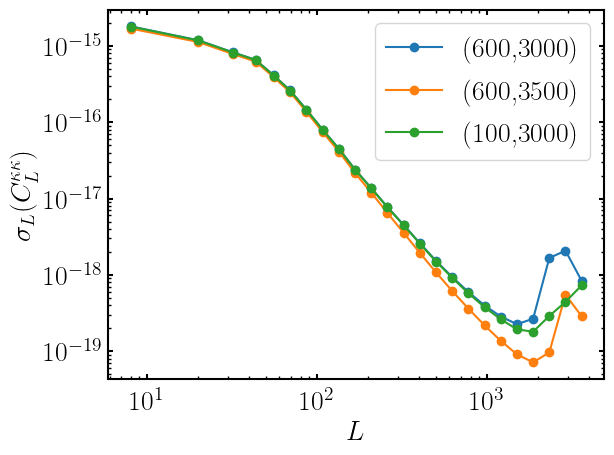

In [151]:
plt.loglog(cents,covariance,'o-', label='(600,3000)')
plt.loglog(cents, cov2, 'o-', label='(600,3500)')
plt.loglog(cents, cov3, 'o-', label='(100,3000)')
plt.legend()
plt.xlabel('$L$')
plt.ylabel(r'$\sigma_L (C_L^{\kappa\kappa})$')
plt.show()

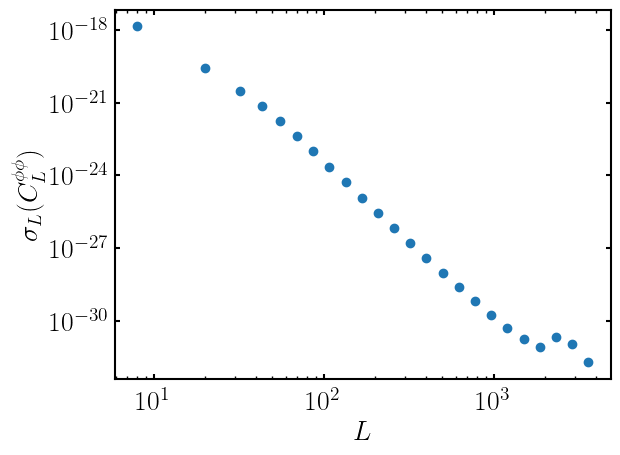

In [153]:
plt.loglog(cents,covariance / (cents * (cents+1) / 2.)**2,'o')
plt.xlabel('$L$')
plt.ylabel(r'$\sigma_L (C_L^{\phi\phi})$')
plt.show()

In [142]:
args.lmax = 3500
Als1 = np.load(args.output_dir + f'stage_compute_filters/{autils.get_norm_name(args)}', allow_pickle=True).item()
    
Nl1 = Als1[args.est][0] * (ell_arr*(ell_arr+1.)/2.)**2.

args.lmax = 3000
Als = np.load(args.output_dir + f'stage_compute_filters/{autils.get_norm_name(args)}', allow_pickle=True).item()
    
Nl = Als[args.est][0] * (ell_arr*(ell_arr+1.)/2.)**2.

args.lmin = 100
Als = np.load(args.output_dir + f'stage_compute_filters/{autils.get_norm_name(args)}', allow_pickle=True).item()
    
Nl2 = Als[args.est][0] * (ell_arr*(ell_arr+1.)/2.)**2.

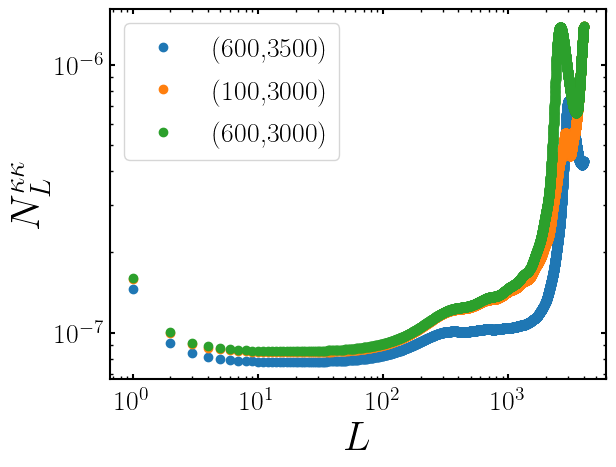

In [144]:
plt.loglog(Nl1,'o', label='(600,3500)')
plt.loglog(Nl2,'o', label='(100,3000)')
plt.loglog(Nl,'o', label='(600,3000)')
plt.xlabel('$L$', fontsize=30)
plt.ylabel('$N_L^{\kappa\kappa}$', fontsize=30)
plt.legend()
plt.show()

/tmp/ipykernel_1556387/436843363.py:1: RuntimeWarning: invalid value encountered in divide
  plt.loglog(Nl/ (ell_arr*(ell_arr+1.)/2.)**2.,'o')


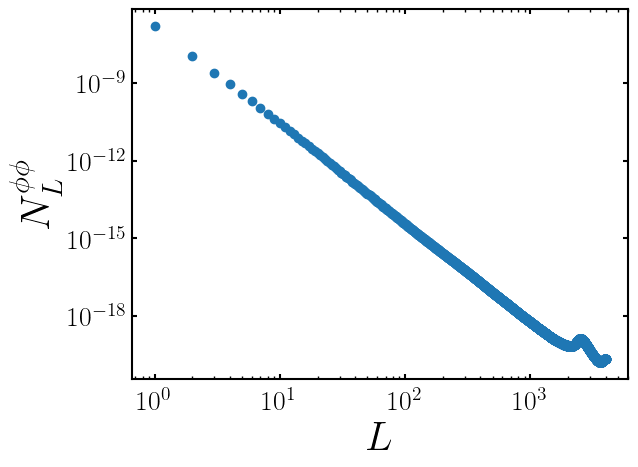

In [137]:

plt.loglog(Nl/ (ell_arr*(ell_arr+1.)/2.)**2.,'o')
plt.xlabel('$L$', fontsize=30)
plt.ylabel('$N_L^{\phi\phi}$', fontsize=30)
plt.show()

In [14]:
ell_arr = np.arange(args.mlmax+1)
cents, bins = pyfisher.get_binner(lbands,interpolate=False)
    
args.lmin = 600
args.lmax = 3000
    
theory = cosmology.default_theory()
tclkk = theory.gCl('kk',ell_arr)
tclkk_bin = bins(pyfisher.interp(ell_arr, tclkk, bounds_error=True))

Als = np.load(args.output_dir + f'stage_compute_filters/{autils.get_norm_name(args)}', allow_pickle=True).item()

Nl = Als[args.est][0] * (ell_arr*(ell_arr+1.)/2.)**2.
nls_kk_bin = bins(pyfisher.interp(ell_arr,Nl,bounds_error=True))

In [20]:
Als[args.est][0] * (ell_arr*(ell_arr+1.))**2. / (2*np.pi)

array([0.00000000e+00, 1.01833196e-07, 6.40317648e-08, ...,
       8.84193871e-07, 8.85625398e-07, 8.87061581e-07])

In [16]:
lfac = (ell_arr * (ell_arr + 1))**2 / (2 * np.pi)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


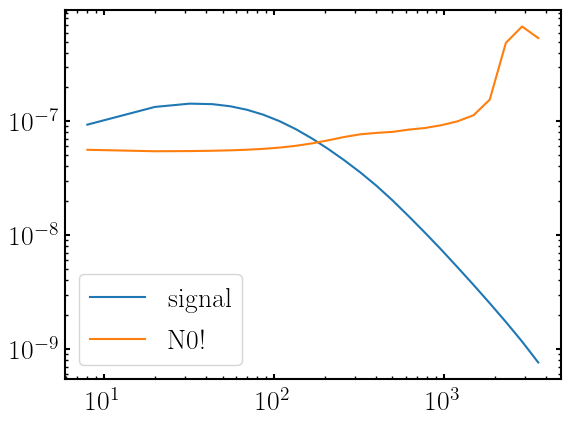

In [23]:
plt.loglog(cents,tclkk_bin * 4 / (2*np.pi), label='signal')
plt.loglog(cents,nls_kk_bin * 4 / (2*np.pi), label='N0!')
plt.legend()

In [39]:
def calculate_Alens(reconstructed_cl, lmin, lmax, lbands, args, fsky, Lmin, Lmax, pp=True):
    
    ell_arr = np.arange(args.mlmax+1)
    cents, bins = pyfisher.get_binner(lbands,interpolate=False)

    if pp:
        bandpowers = reconstructed_cl * (ell_arr*(ell_arr+1.)/2.)**2.
    else:
        bandpowers = reconstructed_cl
    bandpowers = (bins(pyfisher.interp(ell_arr, bandpowers, bounds_error=True)))
    
    covariance, tclkk_bin = return_sigmaAlens(args, lmin, lmax, lbands, fsky)
    # , sum(tclkk_bin**2/covariance), 1/np.sqrt(sum(tclkk_bin**2 / covariance))
    
    Lrange = (cents > Lmin) & (cents < Lmax)
    
    sAlens = 1/np.sqrt(sum(tclkk_bin[Lrange]**2/ covariance[Lrange]))
    DAlens = sum(bandpowers[Lrange] * tclkk_bin[Lrange] / covariance[Lrange]) / sum(tclkk_bin[Lrange]**2/ covariance[Lrange])
    
    return sAlens, DAlens*100, DAlens/sAlens

In [45]:
lmin = 600
lmax = 3000
print(f'(600, 3000) GAL070 sigma(Alens) = {calculate_Alens(reconstructed_cl[f"gauss_GAL060_baseline"],lmin, lmax, lbands, args, wmasks_dict["GAL070"], 10, 3000)[0]:.4f}')

lmin=100
lmax=3000
print(f'(100, 3000) GAL070 sigma(Alens) = {calculate_Alens(reconstructed_cl[f"gauss_GAL060_baseline"],lmin, lmax, lbands, args, wmasks_dict["GAL070"], 10, 3000)[0]:.4f}')

lmin=1000
lmax=3000
print(f'(1000, 3000) GAL070 sigma(Alens) = {calculate_Alens(reconstructed_cl[f"gauss_GAL060_baseline"],lmin, lmax, lbands, args, wmasks_dict["GAL070"], 10, 3000)[0]:.4f}')

lmin=600
lmax=3500
print(f'(600, 3500) GAL070 sigma(Alens) = {calculate_Alens(reconstructed_cl[f"gauss_GAL060_baseline"],lmin, lmax, lbands, args, wmasks_dict["GAL070"], 10, 3000)[0]:.4f}')

lmin = 600
lmax = 3000
print(f'(600, 3000) GAL060 sigma(Alens) = {calculate_Alens(reconstructed_cl[f"gauss_GAL060_baseline"],lmin, lmax, lbands, args, wmasks_dict["GAL060"], 10, 3000)[0]:.4f}')

lmin = 600
lmax = 3000
print(f'(600, 3000) GAL080 sigma(Alens) = {calculate_Alens(reconstructed_cl[f"gauss_GAL060_baseline"],lmin, lmax, lbands, args, wmasks_dict["GAL080"], 10, 3000)[0]:.4f}')


(600, 3000) GAL070 sigma(Alens) = 0.0113
(100, 3000) GAL070 sigma(Alens) = 0.0111
(1000, 3000) GAL070 sigma(Alens) = 0.0118
(600, 3500) GAL070 sigma(Alens) = 0.0096
(600, 3000) GAL060 sigma(Alens) = 0.0118
(600, 3000) GAL080 sigma(Alens) = 0.0107


In [50]:
test='baseline'

Lmin=10
Lmax=4000

print(f'Lmin = {Lmin}')
print(f'Lmax = {Lmax}\n')

print(r'$\Delta(A_{lens}) \times 100$', '\n')

for dust_type in autils.DUST_TYPES[1:]:
    for SKYFRAC in autils.FSKYS:
        
        b1 = calculate_Alens(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'], args.lmin, args.lmax, lbands, args, wmasks_dict[SKYFRAC], Lmin, Lmax)
        
        print(dust_type, SKYFRAC, f"{(b1)[1]:.3f}",f"{(b1)[2]:.3f}" )

Lmin = 10
Lmax = 4000

$\Delta(A_{lens}) \times 100$ 

d9 GAL060 0.003 0.003
d9 GAL070 0.029 0.026
d9 GAL080 0.042 0.040
d10 GAL060 0.005 0.004
d10 GAL070 0.020 0.018
d10 GAL080 0.083 0.079
d12 GAL060 0.145 0.125
d12 GAL070 0.167 0.150
d12 GAL080 0.237 0.224
van GAL060 0.058 0.050
van GAL070 0.050 0.045
van GAL080 0.089 0.084
DF GAL060 0.002 0.001
DF GAL070 0.038 0.034
DF GAL080 0.035 0.033


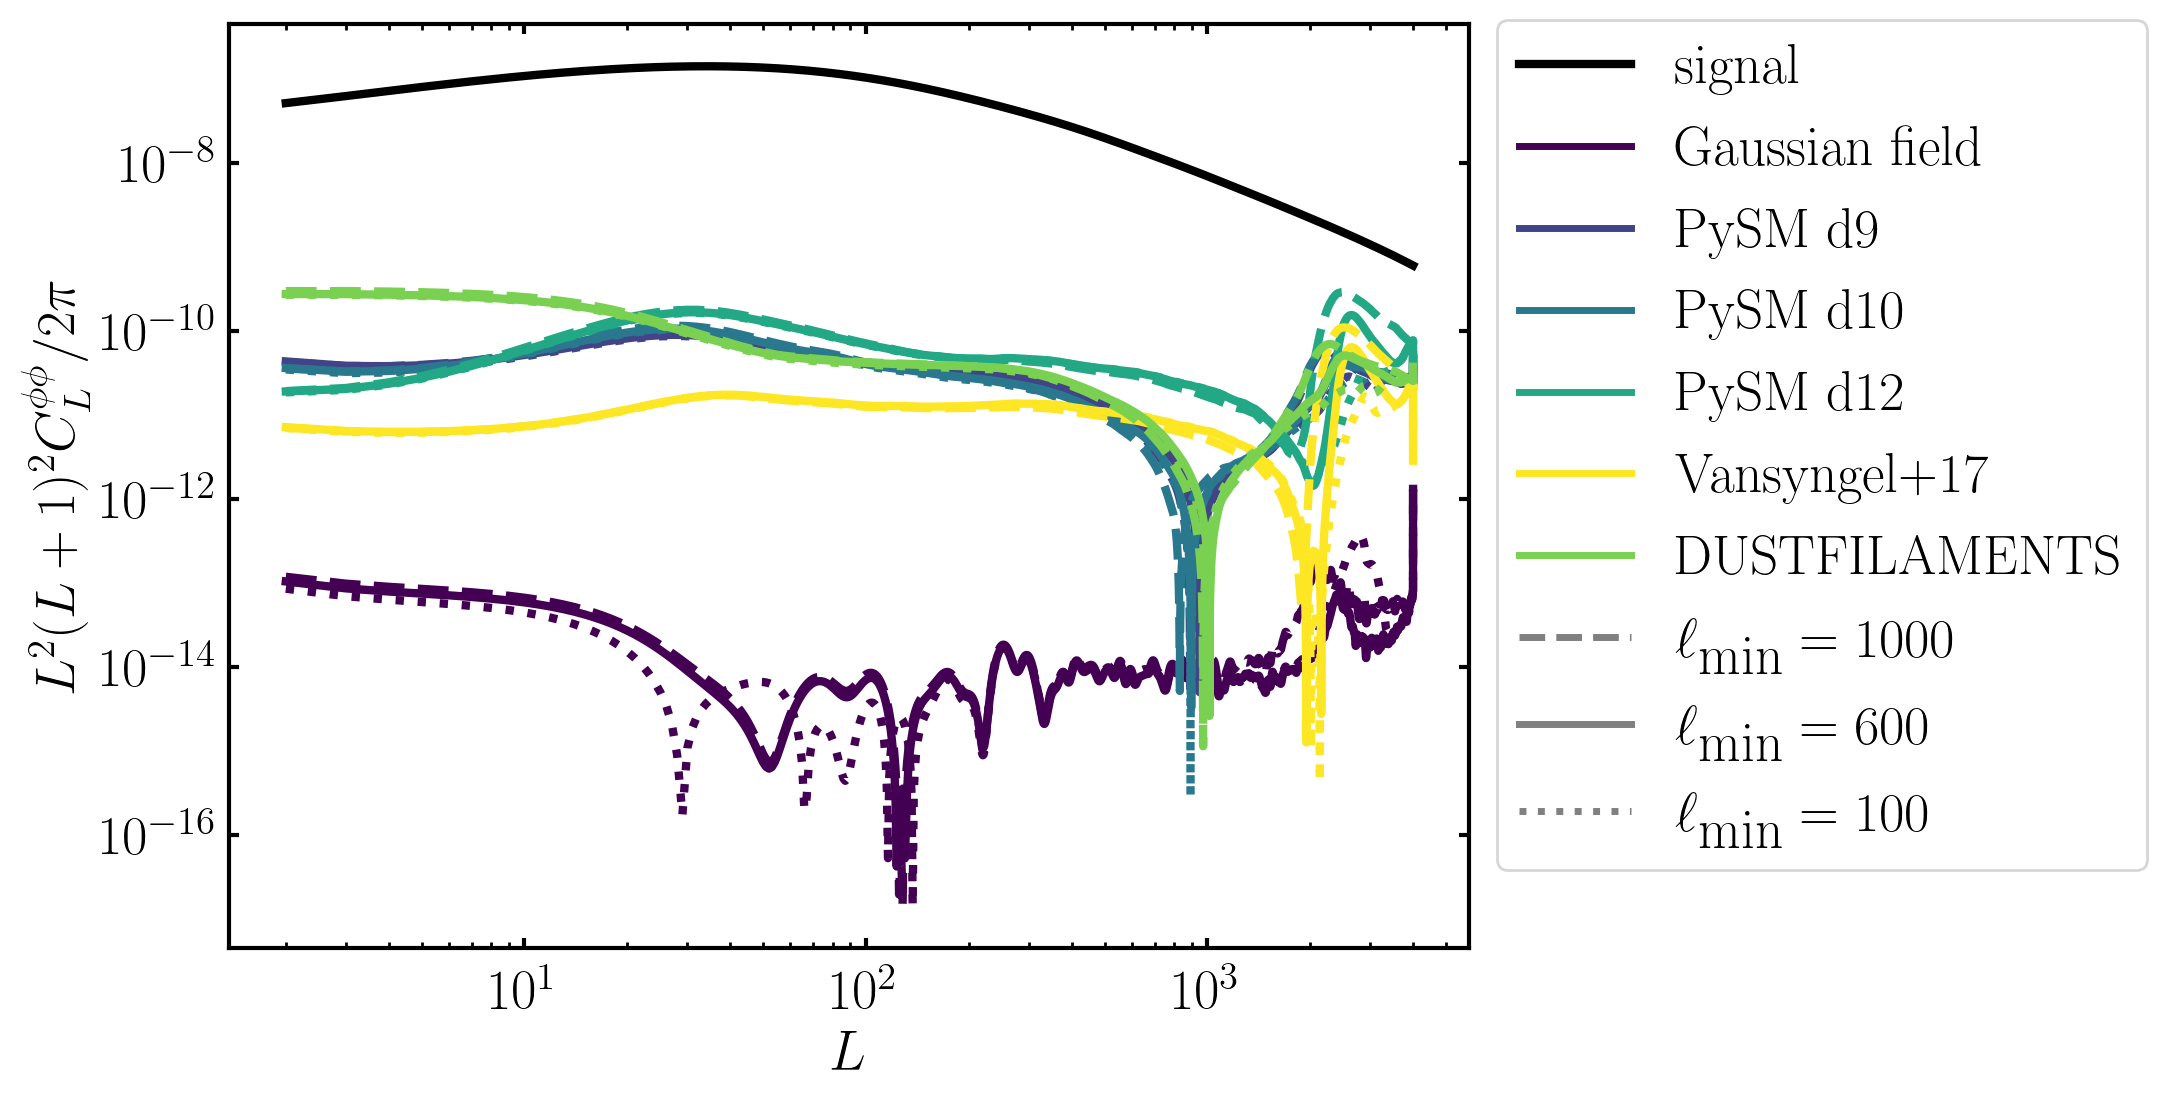

In [98]:
SKYFRAC='GAL070'
#TEST = 'lmin'
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=200)

for dust_type in autils.DUST_TYPES:
    
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin1000'][:args.mlmax+1]*lfac)[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin1000']['linestyle'], linewidth = 3, label=dust_type)
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'][:args.mlmax+1]*lfac)[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin600']['linestyle'], linewidth = 3, label=dust_type)
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin100'][:args.mlmax+1]*lfac)[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin100']['linestyle'], linewidth = 3, label=dust_type)
    

ax.loglog(ell_arr[2:], (tclpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='signal')

custom_lines1 = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
custom_lines2 = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in autils.DUST_TYPES]
custom_lines3 = [Line2D([0], [0], color='gray', linestyle = dict_plot[f'lmin{lmin}']['linestyle'], lw=2.5) for lmin in [1000,600,100]]

custom_lines = custom_lines1 + custom_lines2 + custom_lines3

legend_lines1 = ['signal']
legend_lines2 = [dict_plot[fg_type]['label'] for fg_type in autils.DUST_TYPES]
legend_lines3 = [dict_plot[f'lmin{lmin}']['label'] for lmin in [1000, 600,100]]

legend_lines = legend_lines1 + legend_lines2 +legend_lines3 

legend = ax.legend(custom_lines, legend_lines, bbox_to_anchor=(1, 1.035), loc = 'upper left') # (1, 1.025)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$') 

####fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/recons_baseline_lmax.png', bbox_inches='tight')
fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/lmin.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_1556387/1352372696.py:7: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(ell_arr[2:], (reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin1000'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin1000']['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_1556387/1352372696.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(ell_arr[2:], (reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin600']['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_1556387/1352372696.py:9: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(ell_arr[2:], (reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin100'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin100']['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_1556

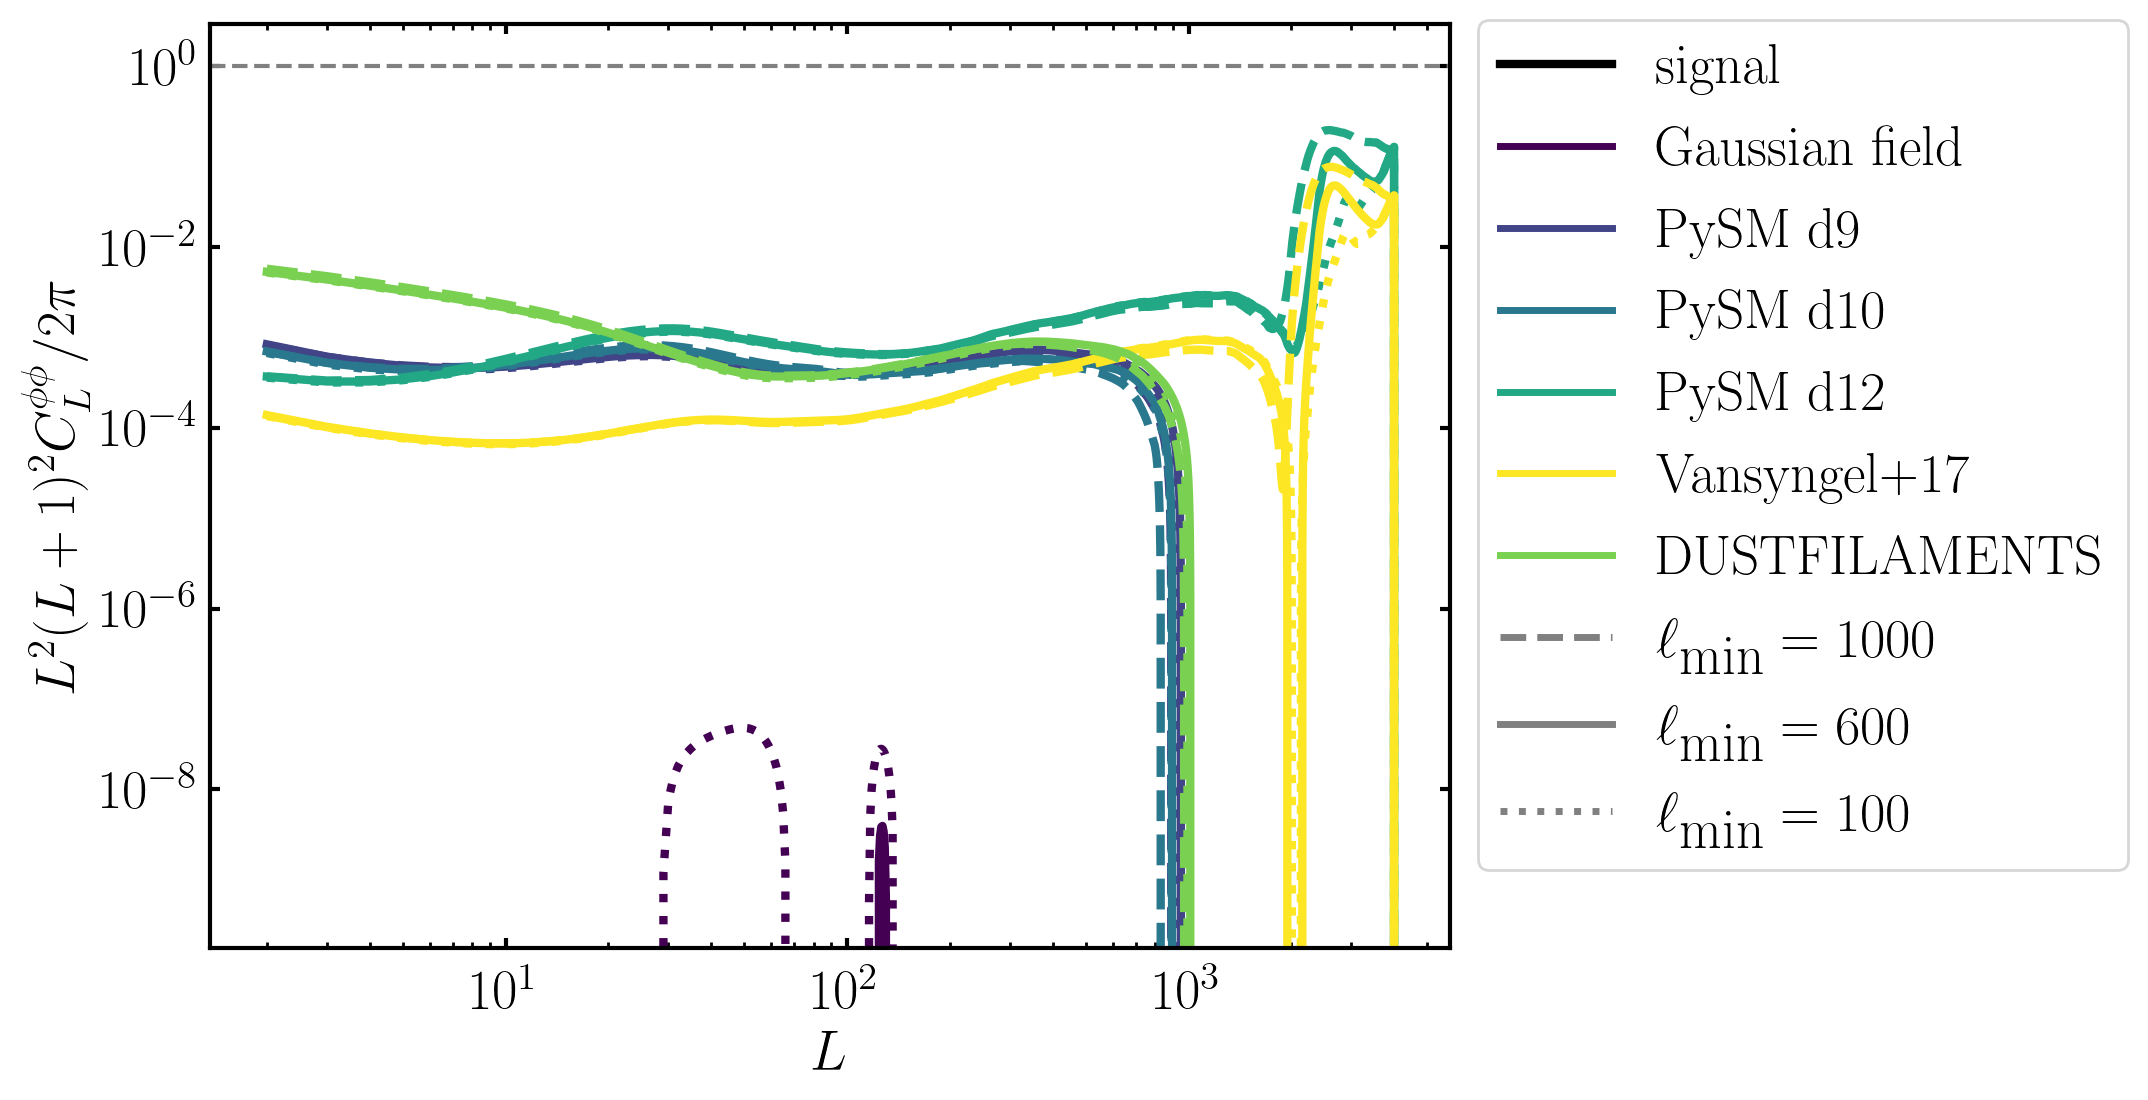

In [99]:
SKYFRAC='GAL070'
#TEST = 'lmin'
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=200)

for dust_type in autils.DUST_TYPES:
    
    ax.loglog(ell_arr[2:], (reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin1000'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin1000']['linestyle'], linewidth = 3, label=dust_type)
    ax.loglog(ell_arr[2:], (reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin600']['linestyle'], linewidth = 3, label=dust_type)
    ax.loglog(ell_arr[2:], (reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin100'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmin100']['linestyle'], linewidth = 3, label=dust_type)
    

#ax.loglog(ell_arr[2:], (tclpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='signal')

custom_lines1 = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
custom_lines2 = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in autils.DUST_TYPES]
custom_lines3 = [Line2D([0], [0], color='gray', linestyle = dict_plot[f'lmin{lmin}']['linestyle'], lw=2.5) for lmin in [1000,600,100]]

custom_lines = custom_lines1 + custom_lines2 + custom_lines3

legend_lines1 = ['signal']
legend_lines2 = [dict_plot[fg_type]['label'] for fg_type in autils.DUST_TYPES]
legend_lines3 = [dict_plot[f'lmin{lmin}']['label'] for lmin in [1000, 600,100]]

legend_lines = legend_lines1 + legend_lines2 +legend_lines3 

legend = ax.legend(custom_lines, legend_lines, bbox_to_anchor=(1, 1.035), loc = 'upper left') # (1, 1.025)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$') 

ax.axhline(1, color='gray', linestyle='dashed')
####fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/recons_baseline_lmax.png', bbox_inches='tight')
fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/lmin_ratio.png', bbox_inches='tight')
plt.show()

In [48]:
test='baseline'

Lmin=10
Lmax=4000

args.lmax=3000
SKYFRAC='GAL070'

print(f'Lmin = {Lmin}')
print(f'Lmax = {Lmax}\n')

print(r'$\Delta(A_{lens}) \times 100$', r'$\Delta(A_{lens}) / \sigma(A_{lens})$', '\n')

for dust_type in autils.DUST_TYPES[1:]:
    
    b1 = calculate_Alens(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'], 600, args.lmax, lbands, args, wmasks_dict['GAL070'] , Lmin, Lmax)
    
    print(dust_type, SKYFRAC, 600, f"{b1[1]:.3f}", f"{b1[2]:.3f}")
    for lmin in [1000, 100]:
        b2 = calculate_Alens(reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmin{lmin}'], lmin, args.lmax, lbands, args, wmasks_dict['GAL070'] , Lmin, Lmax)
        print(dust_type, SKYFRAC, lmin, f"{(b2)[1]:.3f}", f"{(b2)[2]:.3f}")
        

Lmin = 10
Lmax = 4000

$\Delta(A_{lens}) \times 100$ $\Delta(A_{lens}) / \sigma(A_{lens})$ 

d9 GAL070 600 0.040 0.036
d9 GAL070 1000 0.043 0.036
d9 GAL070 100 0.030 0.027
d10 GAL070 600 0.031 0.028
d10 GAL070 1000 0.035 0.030
d10 GAL070 100 0.024 0.021
d12 GAL070 600 0.150 0.134
d12 GAL070 1000 0.134 0.113
d12 GAL070 100 0.151 0.136
van GAL070 600 0.044 0.039
van GAL070 1000 0.037 0.031
van GAL070 100 0.044 0.040
DF GAL070 600 0.050 0.044
DF GAL070 1000 0.054 0.046
DF GAL070 100 0.040 0.036


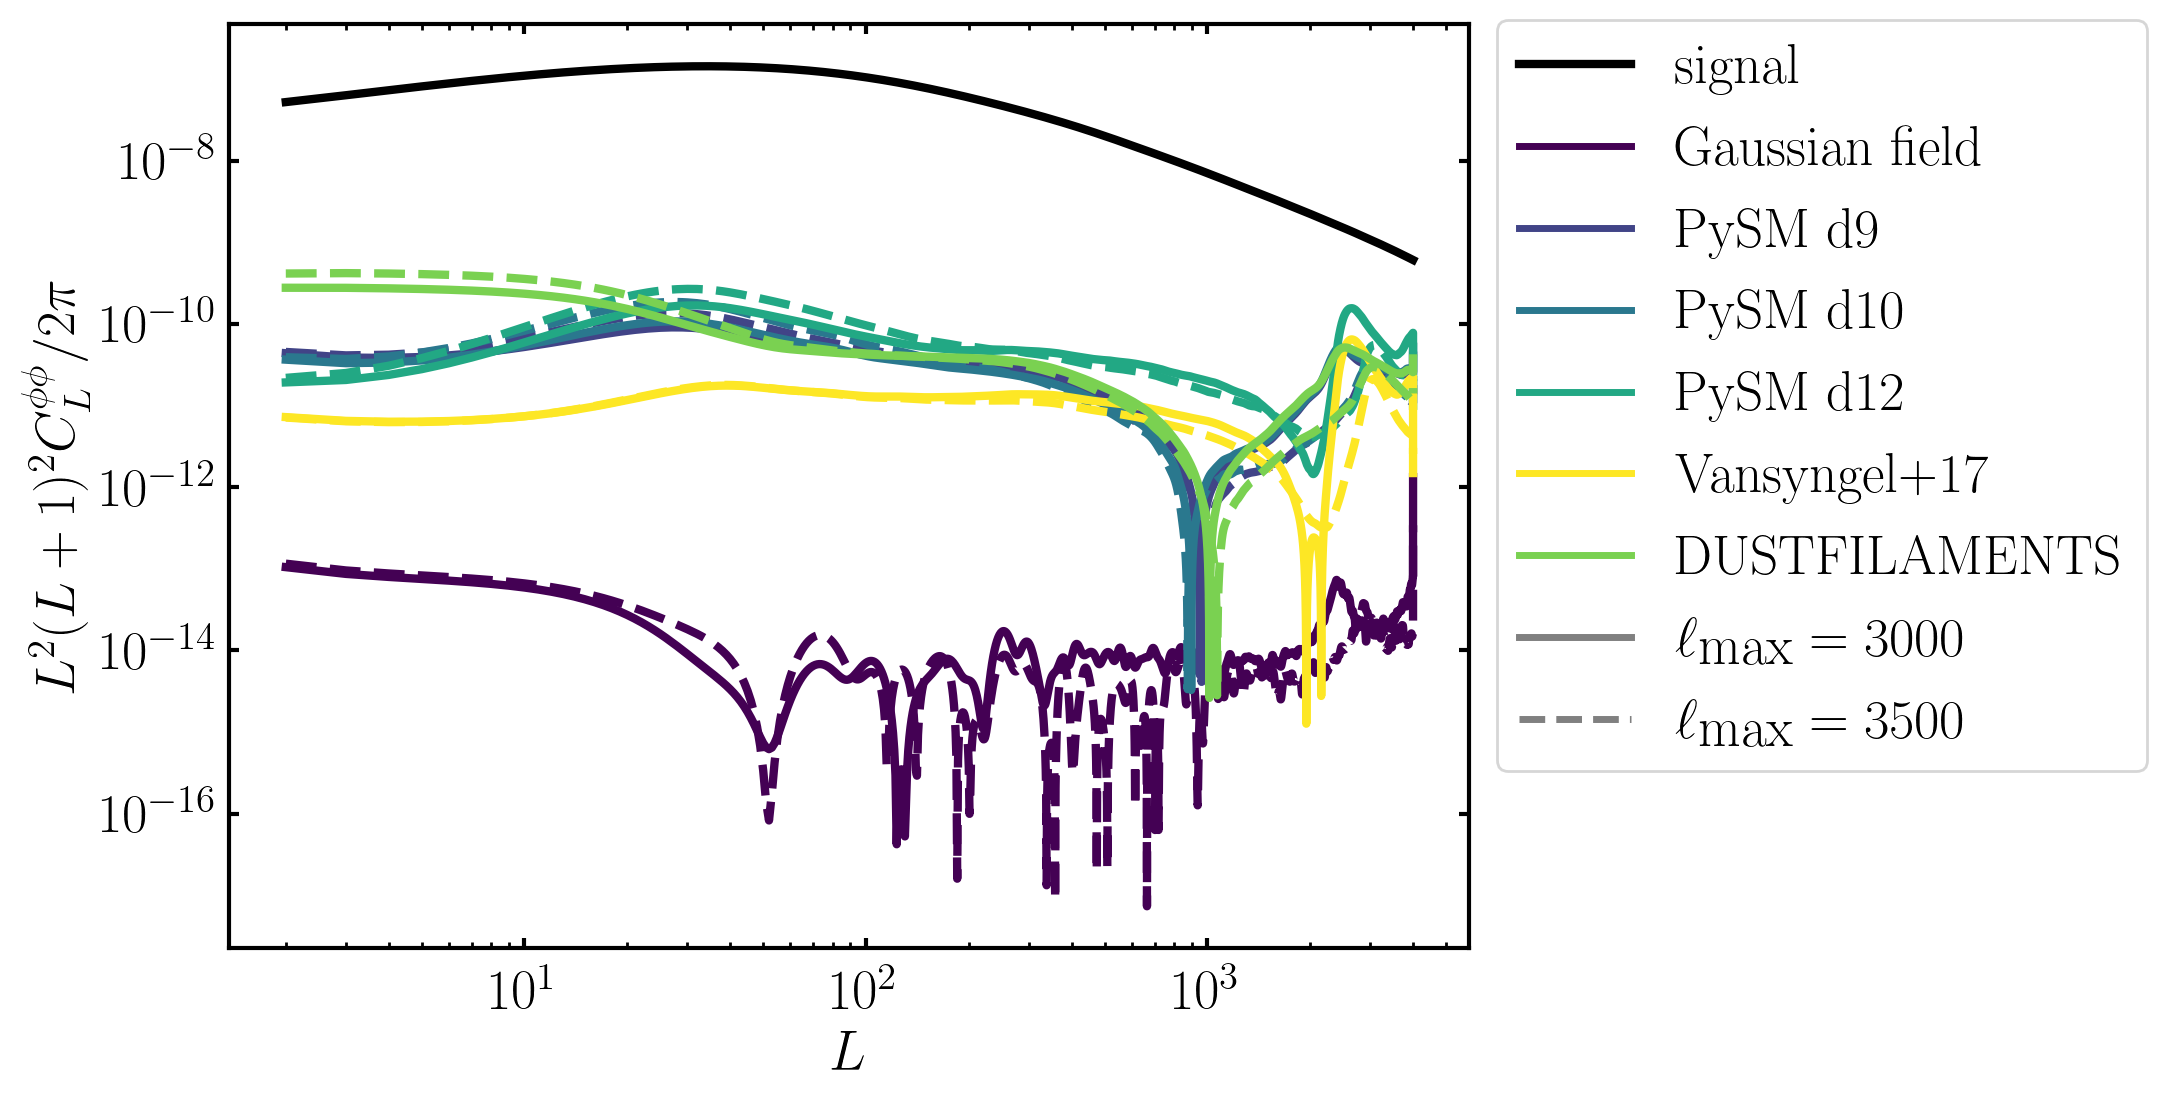

In [100]:
SKYFRAC='GAL070'
TEST = 'lmax3500'
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=200)

for dust_type in autils.DUST_TYPES:
    
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'][:args.mlmax+1]*lfac)[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3500']['linestyle'], linewidth = 3, label=dust_type)
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'][:args.mlmax+1]*lfac)[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3000']['linestyle'], linewidth = 3, label=dust_type)


ax.loglog(ell_arr[2:], (tclpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='signal')

custom_lines1 = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
custom_lines2 = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in autils.DUST_TYPES]
custom_lines3 = [Line2D([0], [0], color='gray', linestyle = dict_plot[f'lmax{lmax}']['linestyle'], lw=2.5) for lmax in [3000, 3500]]

custom_lines = custom_lines1 + custom_lines2 + custom_lines3

legend_lines1 = ['signal']
legend_lines2 = [dict_plot[fg_type]['label'] for fg_type in autils.DUST_TYPES]
legend_lines3 = [dict_plot[f'lmax{lmax}']['label'] for lmax in [3000, 3500]]

legend_lines = legend_lines1 + legend_lines2 +legend_lines3 

legend = ax.legend(custom_lines, legend_lines, bbox_to_anchor=(1, 1.035), loc = 'upper left') # (1, 1.025)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$') 


fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/lmax_GAL070.png', bbox_inches='tight')
####fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/recons_baseline_lmax.png', bbox_inches='tight')

plt.show()

/tmp/ipykernel_1556387/2983821793.py:7: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3500']['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_1556387/2983821793.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3000']['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipykernel_1556387/2983821793.py:7: RuntimeWarning: divide by zero encountered in divide
  ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3500']['linestyle'], linewidth = 3, label=dust_type)
/tmp/ipyker

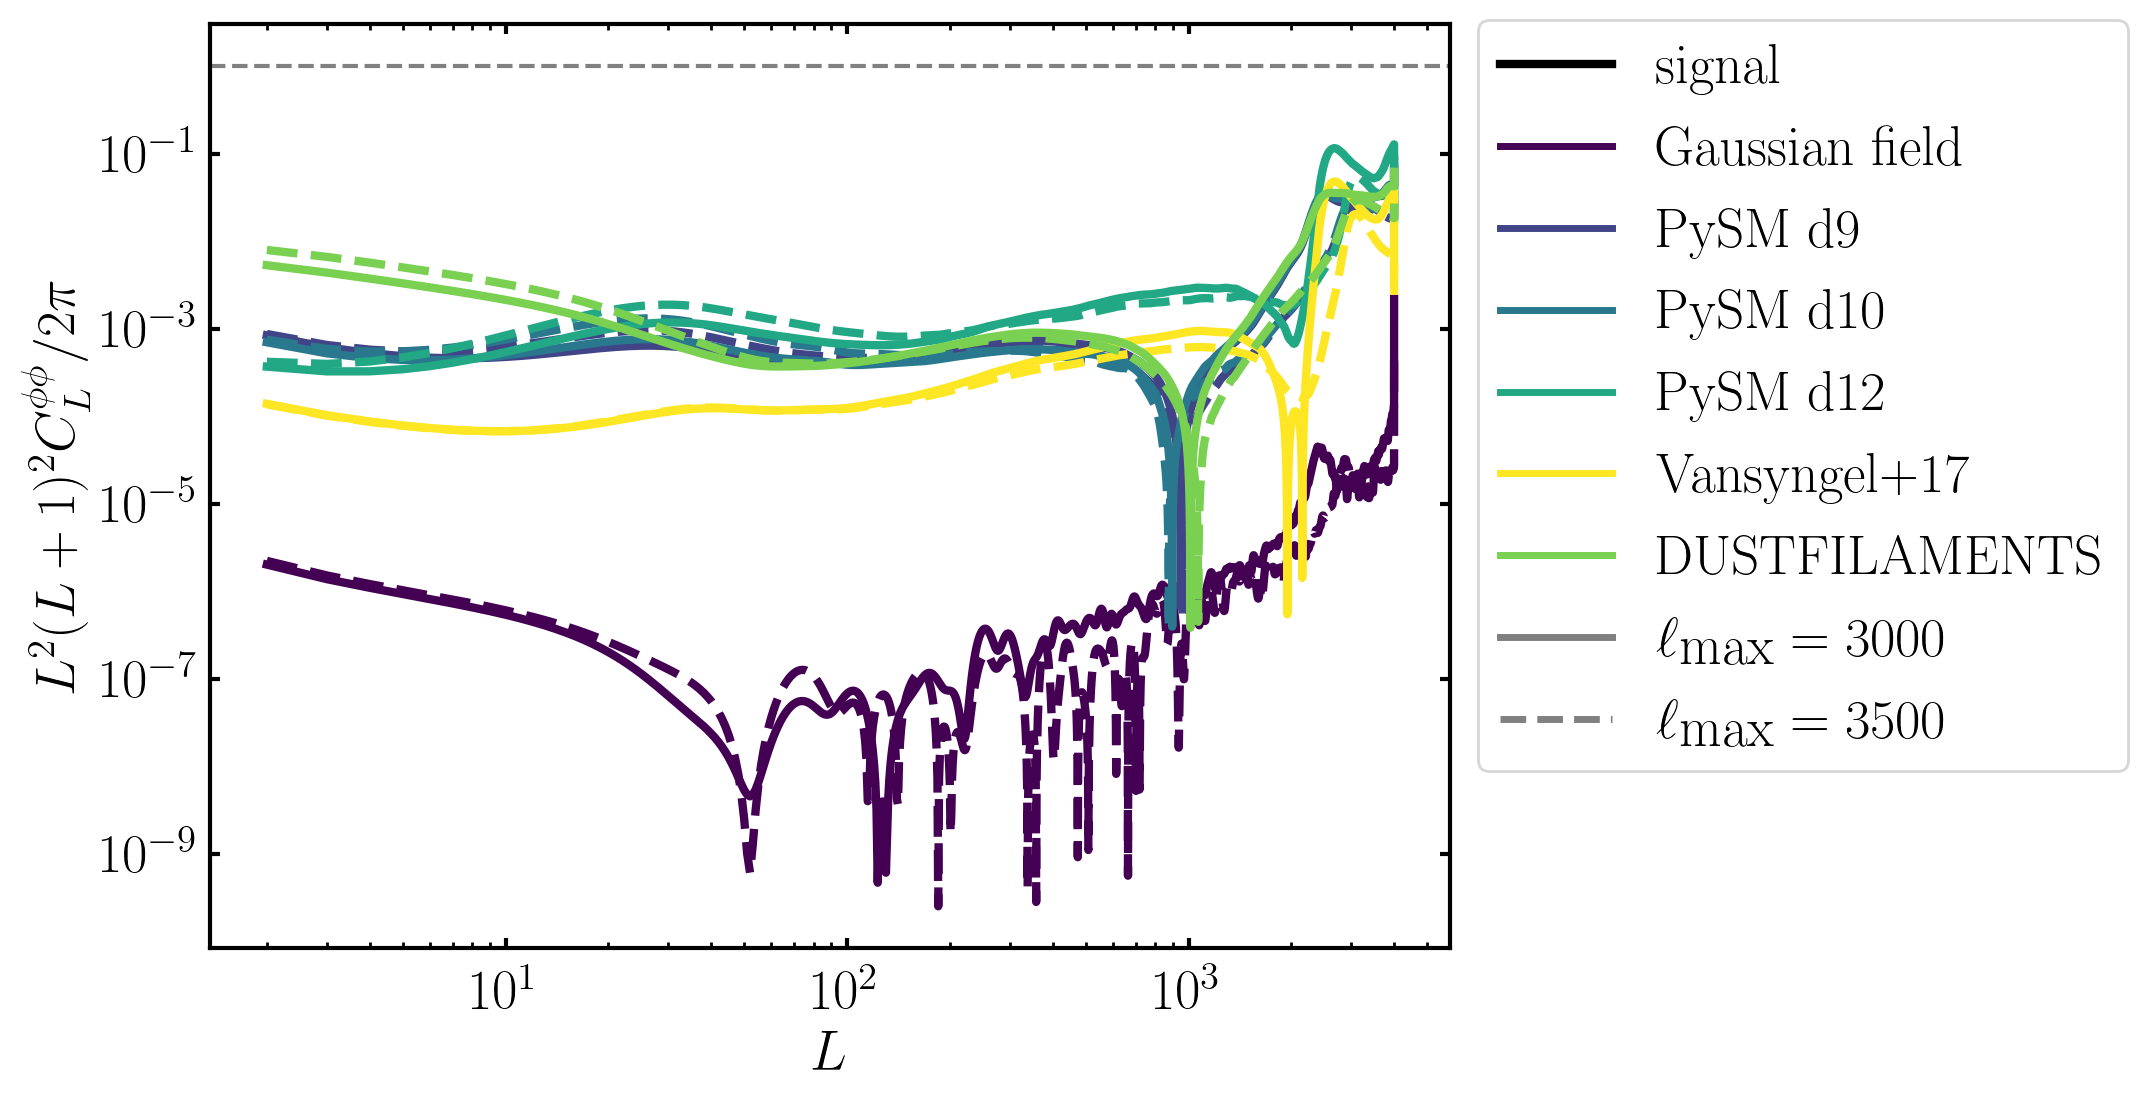

In [101]:
SKYFRAC='GAL070'
TEST = 'lmax3500'
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=200)

for dust_type in autils.DUST_TYPES:
    
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_{TEST}'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3500']['linestyle'], linewidth = 3, label=dust_type)
    ax.loglog(ell_arr[2:], abs(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'][:args.mlmax+1]/tclpp[:args.mlmax+1])[2:], color=dict_plot[dust_type]['color'], linestyle=dict_plot['lmax3000']['linestyle'], linewidth = 3, label=dust_type)


#ax.loglog(ell_arr[2:], (tclpp[:args.mlmax+1]*lfac)[2:], linestyle = 'solid', color ='k', linewidth = 3, label='signal')

custom_lines1 = [Line2D([0], [0], color='black', linestyle = 'solid', lw=3)]
custom_lines2 = [Line2D([0], [0], color=dict_plot[fg_type]['color'], linestyle = 'solid', lw=2.5) for fg_type in autils.DUST_TYPES]
custom_lines3 = [Line2D([0], [0], color='gray', linestyle = dict_plot[f'lmax{lmax}']['linestyle'], lw=2.5) for lmax in [3000, 3500]]

custom_lines = custom_lines1 + custom_lines2 + custom_lines3

legend_lines1 = ['signal']
legend_lines2 = [dict_plot[fg_type]['label'] for fg_type in autils.DUST_TYPES]
legend_lines3 = [dict_plot[f'lmax{lmax}']['label'] for lmax in [3000, 3500]]

legend_lines = legend_lines1 + legend_lines2 +legend_lines3 

legend = ax.legend(custom_lines, legend_lines, bbox_to_anchor=(1, 1.035), loc = 'upper left') # (1, 1.025)

ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^2(L+1)^2C_L^{\phi\phi}/2\pi$') 

ax.axhline(1, color='gray', linestyle='dashed')
####fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/recons_baseline_lmax.png', bbox_inches='tight')
fig.savefig('/home/ia404/gitreps/dustbias/mbatch/local_dustbias/Figures/lmax_GAL070_ratio.png', bbox_inches='tight')

plt.show()

In [47]:
test='baseline'

Lmin=10
Lmax=4000

args.lmin=600
SKYFRAC='GAL070'

print(f'Lmin = {Lmin}')
print(f'Lmax = {Lmax}\n')

print(r'$\Delta(A_{lens}) \times 100$', '\n')

for dust_type in autils.DUST_TYPES[1:]:
    
    b1 = calculate_Alens(reconstructed_cl[f'{dust_type}_{SKYFRAC}_baseline'], 600, 3000, lbands, args, wmasks_dict['GAL070'] , Lmin, Lmax)
    
    print(dust_type, SKYFRAC, 3000, f"{(b1)[1]:.3f}", f"{(b1)[2]:.3f}")
    lmax=3500
    
    b2=calculate_Alens(reconstructed_cl[f'{dust_type}_{SKYFRAC}_lmax{lmax}'], 600, lmax, lbands, args, wmasks_dict['GAL070'] , Lmin, Lmax)
    print(dust_type, SKYFRAC, lmax, f"{(b2)[1]:.3f}", f"{(b2)[2]:.3f}")
        

Lmin = 10
Lmax = 4000

$\Delta(A_{lens}) \times 100$ 

d9 GAL070 3000 0.040 0.036
d9 GAL070 3500 0.031 0.033
d10 GAL070 3000 0.031 0.028
d10 GAL070 3500 0.027 0.028
d12 GAL070 3000 0.150 0.134
d12 GAL070 3500 0.149 0.156
van GAL070 3000 0.044 0.039
van GAL070 3500 0.036 0.038
DF GAL070 3000 0.050 0.044
DF GAL070 3500 0.039 0.041


In [154]:
from scipy.constants import physical_constants

In [155]:
h_JHz = physical_constants['Planck constant'][0]
k_JK  = physical_constants['Boltzmann constant'][0]
T_CMB =  2.72548

In [156]:
def fcmb(nu):

    '''
    spectral energy density in CMB units

    ** parameters **
    nu: float
        frequency in GHz
    '''

    x = h_JHz * 1e9/(k_JK*T_CMB) *nu
    return np.exp(x)*(x/(np.expm1(x)))**2

#All spectra
def comp_sed(nu,nu0,beta,temp,typ):

    '''
    SED for CMB and dust components
    '''

    if typ == 'cmb':
        return fcmb(nu)
    if typ == 'dust':
        x_to=0.04799244662211351*nu/temp
        x_from=0.04799244662211351*nu0/temp
        return (nu/nu0)**(1+beta)*np.expm1(x_from)/np.expm1(x_to)*fcmb(nu0)
    elif typ == 'sync':
        return (nu/nu0)**beta*fcmb(nu0)
    return None

In [157]:
comp_sed(90, 353, 1.59,19.6,  'dust')

0.01252829220029313

In [158]:
comp_sed(150, 353, 1.59,19.6,  'dust')

0.026131787809189976

In [159]:
comp_sed(150, 353, 1.59,19.6,  'dust')/comp_sed(90, 353, 1.59,19.6,  'dust')

2.085822025174234

In [160]:
(150/90)**2.59

3.754812556347107

In [162]:
np.expm1(0.04799244662211351*90/19.6)

0.24654220147767525

In [163]:
np.expm1(0.04799244662211351*150/19.6)

0.44381531243084155

In [164]:
(150/90)**2.59 * np.expm1(0.04799244662211351*90/19.6) / np.expm1(0.04799244662211351*150/19.6)

2.0858220251742337